### Step 1: Problem Setup
Let’s say we want to train a neural network to perform a binary classification task:

Input: Two numbers (e.g., [x1, x2]).
Output: A single value (0 or 1), indicating whether the input belongs to one class or another.
For simplicity, we’ll use a dataset where:

If x1 + x2 > 0, the output is 1.
Otherwise, the output is 0.
This is a simple linear decision boundary.

### Step 2: Neural Network Architecture
Our neural network will have:

Input Layer: 2 neurons (for x1 and x2).
Hidden Layer: 2 neurons (with ReLU activation).
Output Layer: 1 neuron (with Sigmoid activation for binary classification).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function (used in backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Define the derivative of the ReLU function (used in backpropagation)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [5]:
# Training data
inputs = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])  # Input features
targets = np.array([[1], [0], [0], [0]])  # Target outputs

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
weights_input_hidden = np.random.rand(2, 2)  # Weights between input and hidden layer
bias_hidden = np.random.rand(1, 2)  # Bias for hidden layer
weights_hidden_output = np.random.rand(2, 1)  # Weights between hidden and output layer
bias_output = np.random.rand(1, 1)  # Bias for output layer

# Learning rate
learning_rate = 0.1

In [7]:
# Training loop
epochs = 10000  # Number of iterations
losses = []  # To store the loss at each epoch

for epoch in range(epochs):
    # --- Forward Propagation ---
    # Input to hidden layer
    hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_layer_output = relu(hidden_layer_input)  # Apply ReLU activation

    # Hidden to output layer
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)  # Apply Sigmoid activation

    # --- Backpropagation ---
    # Calculate error
    error = targets - predicted_output
    loss = np.mean(np.square(error))  # Mean Squared Error
    losses.append(loss)

    # Gradient of the output layer (Sigmoid derivative)
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    # Gradient of the hidden layer (ReLU derivative)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * relu_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Final output after training
print("Predicted Output:")
print(predicted_output)


Predicted Output:
[[0.99350028]
 [0.01376893]
 [0.01406129]
 [0.01376893]]


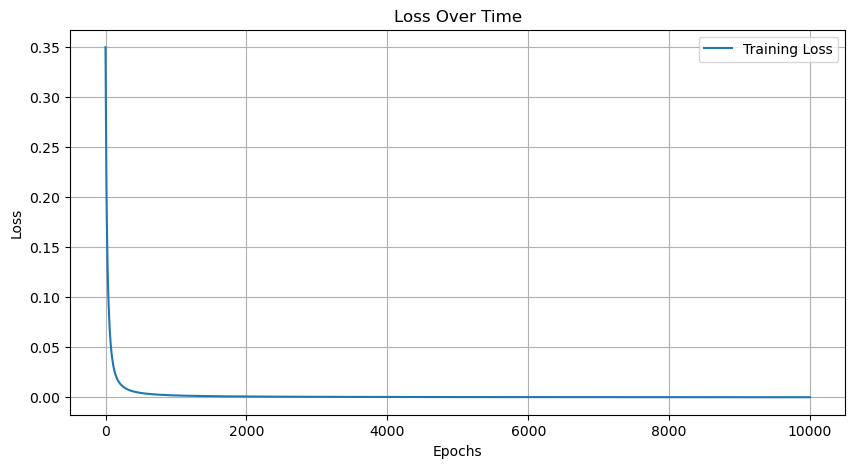

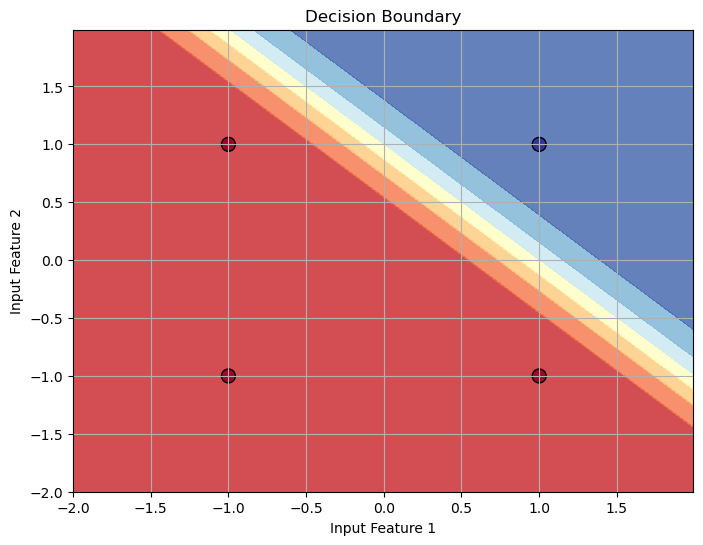

In [9]:
# --- Visualization 1: Loss Over Time ---
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), losses, label='Training Loss')
plt.title('Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# --- Visualization 2: Decision Boundary ---
# Create a grid of points to visualize the decision boundary
x_min, x_max = inputs[:, 0].min() - 1, inputs[:, 0].max() + 1
y_min, y_max = inputs[:, 1].min() - 1, inputs[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the grid
grid_inputs = np.c_[xx.ravel(), yy.ravel()]
hidden_layer_input = np.dot(grid_inputs, weights_input_hidden) + bias_hidden
hidden_layer_output = relu(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
grid_predictions = sigmoid(output_layer_input)
grid_predictions = grid_predictions.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_predictions, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets.flatten(), edgecolors='k', marker='o', s=100, cmap=plt.cm.RdYlBu)
plt.title('Decision Boundary')
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.grid(True)
plt.show()

Step 4: Key Terms Explained in the Code
Let’s break down the code and point out the key terms we discussed earlier:

1. Neuron:
Each element in the weight matrices (weights_input_hidden and weights_hidden_output) represents a connection between neurons.
The calculations at each layer (e.g., hidden_layer_input and output_layer_input) simulate how neurons process inputs.
2. Layer:
Input Layer: The inputs array represents the input layer. It contains the raw data fed into the network.
Hidden Layer: The hidden_layer_output is the result of applying the ReLU activation function to the weighted sum of inputs.
Output Layer: The predicted_output is the final result after applying the Sigmoid activation function.
3. Weights and Biases:
weights_input_hidden and weights_hidden_output are the weights connecting the layers.
bias_hidden and bias_output are the biases added to each layer.
4. Activation Functions:
ReLU: Used in the hidden layer to introduce non-linearity. It outputs 0 for negative values and the input itself for positive values.
Sigmoid: Used in the output layer to squash the output into a range between 0 and 1. This is useful for binary classification.
5. Forward Propagation:
The forward pass happens when we calculate hidden_layer_output and predicted_output. The data flows from the input layer to the hidden layer and then to the output layer.
6. Backpropagation:
After calculating the error (targets - predicted_output), we compute gradients (d_predicted_output and d_hidden_layer) to adjust the weights and biases.
The weights and biases are updated using gradient descent with the learning rate.
7. Gradient Descent:
The weights and biases are updated in the direction that minimizes the error. The learning rate (0.1) controls the step size.
8. Loss/Error:
The error variable represents the difference between the predicted output and the true target. Minimizing this error is the goal of training.